JSON -> em Python se assemelha a um dicionário, ambos utilizam chave-valor e suportam diferentes tipos de dados. Entretanto, JSON é um formato textual, e não um tipo de dado interno do Python, logo precisamos convertê-lo.




In [4]:
import json

#JSON em formato de string (como ele está armazenado no arquivo)

json_texto = '''
{
    "nome": "João",
    "sobrenome": "Silva",
    "idade": 30,
    "filhos": ["Pedro", "Maria"],
    "tem_experiencia": true
}
'''
#Convertendo JSON (texto para dicionário)
dicionario = json.loads(json_texto)
print(dicionario)

#Agora podemos acessá-lo como um dicionário
print(dicionario["nome"])
print(dicionario["sobrenome"])


{'nome': 'João', 'sobrenome': 'Silva', 'idade': 30, 'filhos': ['Pedro', 'Maria'], 'tem_experiencia': True}
João
Silva


In [6]:
with open("meuarquivo.txt", "w", encoding="utf-8") as f:
    pass #Apenas cria o arquivo sem escrever nada

In [ ]:
#Lendo um arquivo Texto Inteiro
with open("meuarquivo.txt", "r", encoding="utf-8") as f:
    texto = f.read()
    print(texto)

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

print(len(df))
df.head()

244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#Exibindo informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
#Verificando estatísticas descritivas
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df["total_bill"].quantile(0.25)

13.3475

In [5]:
#Selecionando apenas a coluna 'total_bill'
df['total_bill'].head(12)

0     16.99
1     10.34
2     21.01
3     23.68
4     24.59
5     25.29
6      8.77
7     26.88
8     15.04
9     14.78
10    10.27
11    35.26
Name: total_bill, dtype: float64

In [17]:
#Filtrando os pedidos que deram gorjeta maior que 5
df[df['tip'] > 5]


,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


In [7]:
set(df['day']) #Retorna os valores únicos da coluna 'day'

{'Fri', 'Sat', 'Sun', 'Thur'}

In [9]:
#value counts
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [18]:
#Quantidade de pedidos que deram gorjeta maior que 5
len(df[df['tip'] > 5])

18

In [21]:
#Quais são os dias que tem na tabela?
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [19]:
#Média do valor total da conta por dia
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [23]:
#Soma do valor total da conta por dia
df.groupby('day')['total_bill'].sum()


day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [24]:
#Contagem de pedidos por tipo de fumante
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [25]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [27]:
#Criando uma nova coluna com a porcentagem da gorjeta em relação ao total da conta
df['porcentagem'] = (df['tip'] / df['total_bill']) * 100
#df.head()

#tem como arredondar o valor da porcentagem?
df['porcentagem'] = df['porcentagem'].round(2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,porcentagem
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [28]:
#porcentagem média da gorjeta em relação ao total da conta
df['porcentagem'].mean()


16.079754098360652

In [30]:
df['porcentagem'].min()

3.56

In [29]:
df['porcentagem'].max()

71.03

In [31]:
df['porcentagem'].describe()

count    244.000000
mean      16.079754
std        6.107020
min        3.560000
25%       12.910000
50%       15.475000
75%       19.147500
max       71.030000
Name: porcentagem, dtype: float64

In [18]:
#Criar uma nova coluna que é o valor da conta - gorjeta

df['valor_conta'] = df['total_bill'] - df['tip']

df.head()

,total_bill,tip,sex,smoker,day,time,size,valor_conta,valor_conta_por_pessoa
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,7.990000
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,2.893333
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,5.836667
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,10.185000
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,5.245000


In [19]:
df['valor_conta_por_pessoa'] = df['valor_conta'] / df['size']   #size é a quantidade de pessoas na mesa

df.head()

,total_bill,tip,sex,smoker,day,time,size,valor_conta,valor_conta_por_pessoa
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,7.990000
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,2.893333
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,5.836667
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,10.185000
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,5.245000


In [35]:
df['sex'].describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [37]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [39]:
#Qual a média de gorjeta por time?

df.groupby('time')['tip'].describe()


,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


In [45]:
#Qual a média de gorjeta por time e smoker? 

df.groupby(['time', 'smoker', 'sex'])['tip'].mean()

time    smoker  sex   
Dinner  No      Female    3.044138
                Male      3.158052
        Yes     Female    2.949130
                Male      3.123191
Lunch   No      Female    2.459600
                Male      2.941500
        Yes     Female    2.891000
                Male      2.790769
Name: tip, dtype: float64

In [13]:
#Média do valor total da conta por dia
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [14]:
df[(df['time'] == 'Dinner') & (df['smoker'] == 'Yes') & (df['day'] == 'Sat') & (df['size'] == 2) & (df['sex'] == 'Male')]

,total_bill,tip,sex,smoker,day,time,size
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
69,15.01,2.09,Male,Yes,Sat,Dinner,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2
105,15.36,1.64,Male,Yes,Sat,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
107,25.21,4.29,Male,Yes,Sat,Dinner,2
171,15.81,3.16,Male,Yes,Sat,Dinner,2


In [59]:
#Média das gorjetas

df[(df['time'] == 'Dinner') & (df['smoker'] == 'Yes') & (df['day'] == 'Sat') & (df['size'] == 2) & (df['sex'] == 'Male')] ['tip'].mean()

2.3182352941176467

In [60]:
#Quantos fumantes deram gorjeta no jantar de sábado?

len(df[(df['time'] == 'Dinner') & (df['smoker'] == 'Yes') & (df['day'] == 'Sat')])

42

<Axes: >

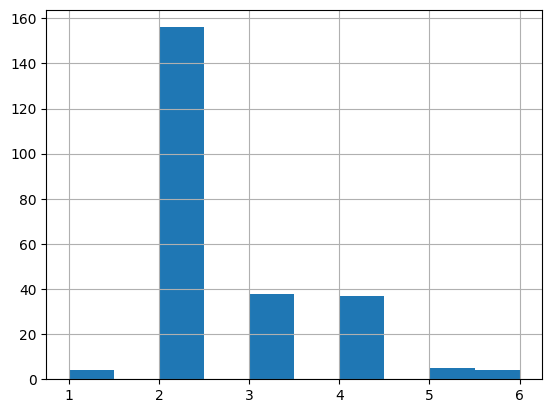

In [12]:
df['size'].hist() #Histograma